<a href="https://colab.research.google.com/github/IdealisticINTJ/TLDR-Summarizer/blob/main/TextSummarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries
import bs4 as bs
import urllib.request as url
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import heapq
from string import punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
scraped_data = url.urlopen('https://en.wikipedia.org/wiki/Tourette_syndrome')
article = scraped_data.read()
parsed_article = bs.BeautifulSoup(article,'lxml')
paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

In [5]:
article_text

'\nTourette syndrome or Tourette\'s syndrome (abbreviated as TS or Tourette\'s) is a common neurodevelopmental disorder that begins in childhood or adolescence. It is characterized by multiple movement (motor) tics and at least one vocal (phonic) tic. Common tics are blinking, coughing, throat clearing, sniffing, and facial movements. These are typically preceded by an unwanted urge or sensation in the affected muscles known as a premonitory urge, can sometimes be suppressed temporarily, and characteristically change in location, strength, and frequency. Tourette\'s is at the more severe end of a spectrum of tic disorders. The tics often go unnoticed by casual observers.\nTourette\'s was once regarded as a rare and bizarre syndrome and has popularly been associated with coprolalia (the utterance of obscene words or socially inappropriate and derogatory remarks). It is no longer considered rare; about 1% of school-age children and adolescents are estimated to have Tourette\'s,[1] and co

In [6]:
# remove square brackets and extra spaces
article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)
article_text = re.sub(r'\s+', ' ', article_text)

In [7]:
# remove special characters and digits
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)

In [8]:
sentence_list = nltk.sent_tokenize(article_text)

In [9]:
stopwords = nltk.corpus.stopwords.words('english')

In [10]:
word_frequencies = {}

for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords and word not in punctuation:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

In [11]:
word_frequencies

{'Tourette': 92,
 'syndrome': 28,
 'abbreviated': 1,
 'TS': 49,
 'common': 4,
 'neurodevelopmental': 4,
 'disorder': 28,
 'begins': 1,
 'childhood': 5,
 'adolescence': 7,
 'It': 6,
 'characterized': 1,
 'multiple': 6,
 'movement': 7,
 'motor': 19,
 'tics': 151,
 'least': 2,
 'one': 13,
 'vocal': 12,
 'phonic': 2,
 'tic': 60,
 'Common': 1,
 'blinking': 4,
 'coughing': 1,
 'throat': 4,
 'clearing': 2,
 'sniffing': 2,
 'facial': 2,
 'movements': 17,
 'These': 5,
 'typically': 7,
 'preceded': 3,
 'unwanted': 4,
 'urge': 18,
 'sensation': 4,
 'affected': 2,
 'muscles': 3,
 'known': 4,
 'premonitory': 10,
 'sometimes': 3,
 'suppressed': 2,
 'temporarily': 2,
 'characteristically': 1,
 'change': 4,
 'location': 4,
 'strength': 1,
 'frequency': 4,
 'severe': 19,
 'end': 2,
 'spectrum': 9,
 'disorders': 41,
 'The': 46,
 'often': 18,
 'go': 3,
 'unnoticed': 1,
 'casual': 2,
 'observers': 3,
 'regarded': 1,
 'rare': 9,
 'bizarre': 4,
 'popularly': 1,
 'associated': 15,
 'coprolalia': 6,
 'utteran

In [12]:
maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

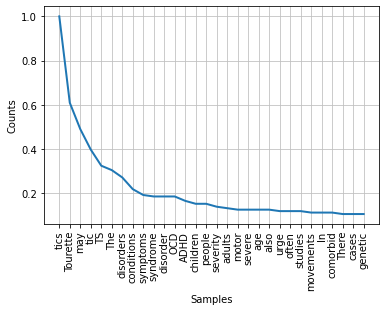

In [13]:
frequency_dist = nltk.FreqDist(word_frequencies)
frequency_dist.plot(30)

In [14]:
sentence_scores = {}

for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

In [15]:
sentence_scores

{" Tourette syndrome or Tourette's syndrome (abbreviated as TS or Tourette's) is a common neurodevelopmental disorder that begins in childhood or adolescence.": 0.7019867549668874,
 'A 1998 study from the Yale Child Study Center showed that tic severity increased with age until it reached its highest point between ages eight and twelve.': 0.9271523178807946,
 'A French doctor, Jean Marc Gaspard Itard, reported the first case of Tourette syndrome in 1825, describing the Marquise de Dampierre, an important woman of nobility in her time.': 0.48344370860927155,
 'A better understanding of comorbid conditions is needed to untangle any neuropsychological differences between TS-only individuals and those with comorbid conditions.': 0.8741721854304636,
 "A child's parents are typically the first to notice their tics; they may feel worried, imagine that they are somehow responsible, or feel burdened by misinformation about Tourette's.": 1.860927152317881,
 'A few rare highly penetrant genetic m

In [16]:
summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)
summary = ' '.join(summary_sentences)

In [17]:
summary

'If another condition might better explain the tics, tests may be done; for example, if there is diagnostic confusion between tics and seizure activity, an EEG may be ordered. TS experts debate whether increasing a child\'s awareness of tics with HRT/CBIT (as opposed to ignoring tics) can lead to more tics later in life. Among people who experience more severe tics, complex tics may develop, including "arm straightening, touching, tapping, jumping, hopping and twirling". Up to 1% of the overall population experiences tic disorders, including chronic tics and transient (provisional or unspecified) tics in childhood. Because tics are more commonly expressed in private, Tourette syndrome may go unrecognized, and casual observers might not notice tics. Some people may learn to camouflage socially inappropriate tics or channel the energy of their tics into a functional endeavor. The caudate nuclei may be smaller in subjects with tics compared to those without tics, supporting the hypothesis